In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
import tensorflow as tf
import gin

In [3]:
mol = gin.i_o.from_smiles.to_mol('CC')
mol = gin.deterministic.hydrogen.add_hydrogen(mol)
atoms, adjacency_map = mol

walk = tf.constant([[2, 0, 3, 0, 4, 0, 1, 5, 1, 6, 1, 7]], dtype=tf.int64)

In [4]:
import flow
import add_hydrogen

In [86]:
graph_flow = flow.GraphFlow(flow_depth=3)

z = tf.random.normal((32, 6, 3))

x, log_det = graph_flow.f_zx(
    z,
    atoms,
    adjacency_map,
    tf.tile(walk, [32, 1]))


In [105]:
# 
graph_flow.load_weights('graph_flow.h5')

In [106]:
print(mol[1])

tf.Tensor(
[[0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(8, 8), dtype=float32)


In [107]:
cc_bond_length = []

In [111]:
h = np.load('h.npy')
ts = np.load('ts.npy')

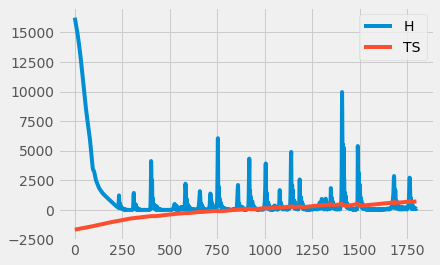

In [116]:
plt.plot(h[100:], label='H')
plt.plot(ts[100:], label='TS')
plt.legend()

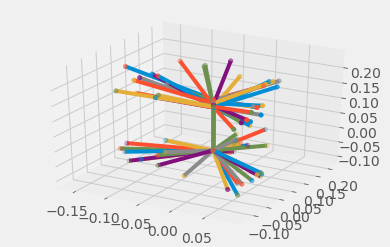

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# walk = _chinese_postman_routes

bond_length = []

# ax.axis('off')

z = tf.random.normal((32, 6, 3), stddev=0.1 ** 1.3)
x, _ = graph_flow.f_zx(z, atoms, adjacency_map, tf.tile(walk, [32, 1]))
# x = x - tf.expand_dims(x[:, 0, :], 1)
x = graph_flow.whitening(x)

for idx in range(10):

    ax.scatter(x[idx, :, 0], x[idx, :, 1], x[idx, :, 2])

    bond_idxs = tf.where(
        tf.greater(
            adjacency_map,
            tf.constant(0, dtype=tf.float32)))

    bond_xyz = tf.gather(
        x[idx],
        bond_idxs)

    bond_length.append(tf.norm(
        bond_xyz[:, 1, :] - bond_xyz[:, 0, :],
        axis=-1).numpy())

    for bond_idx in range(tf.shape(bond_xyz)[0]):
        ax.plot(
            np.linspace(
                bond_xyz[bond_idx, 0, :],
                bond_xyz[bond_idx, 1, :])[:, 0],
            np.linspace(
                bond_xyz[bond_idx, 0, :],
                bond_xyz[bond_idx, 1, :])[:, 1],
            np.linspace(
                bond_xyz[bond_idx, 0, :],
                bond_xyz[bond_idx, 1, :])[:, 2],
                )

# plt.savefig('b' + str(idx0) + '.png', dpi=500)

tf.Tensor([512   9], shape=(2,), dtype=int32)
tf.Tensor([512   9], shape=(2,), dtype=int32)
tf.Tensor([512   9], shape=(2,), dtype=int32)
tf.Tensor([512   9], shape=(2,), dtype=int32)


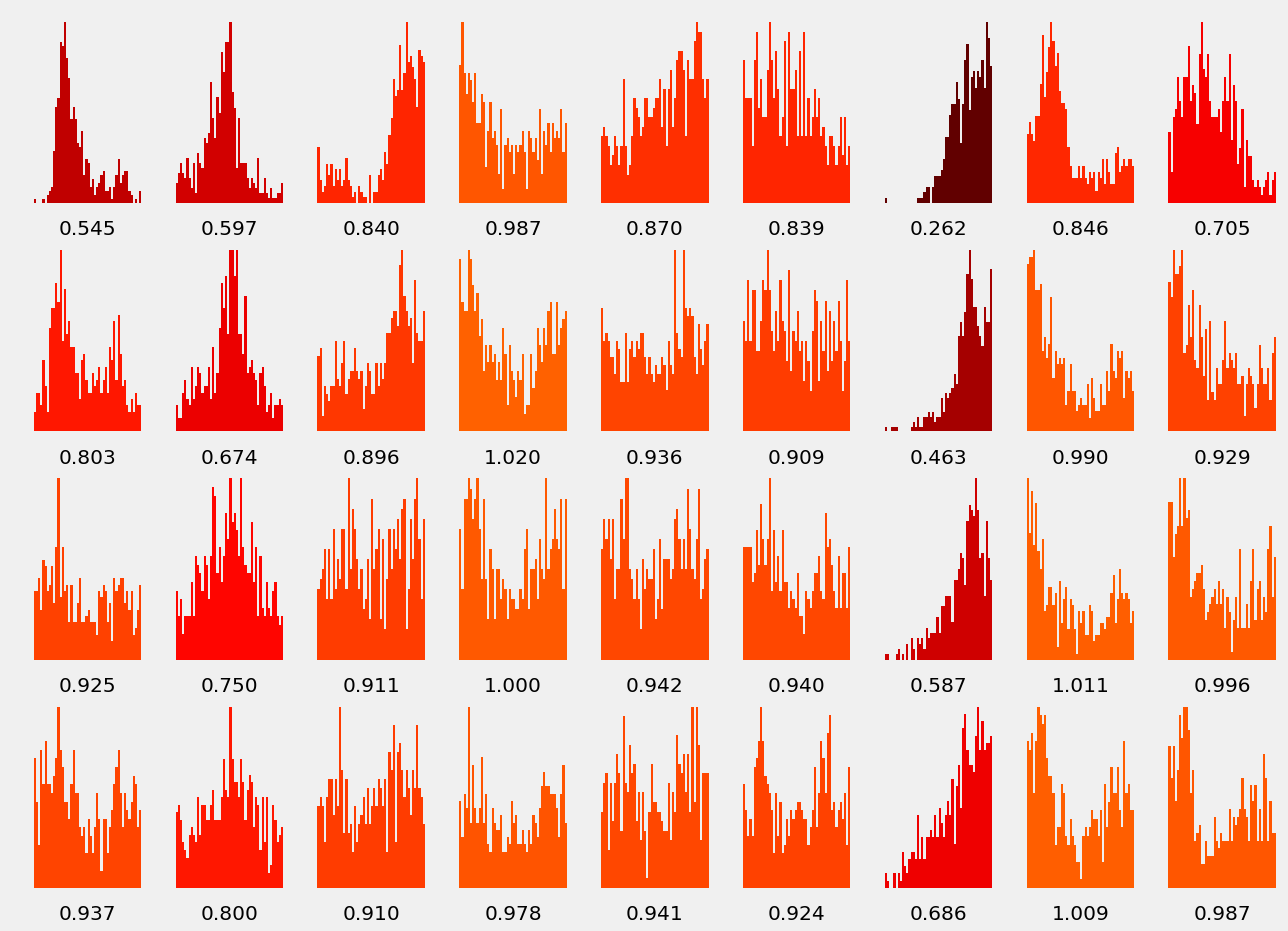

In [94]:
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(4, 9, figsize=(20,15))
import matplotlib.cm as cm
torsion_idxs = tf.constant([
    [2, 0, 1, 5],
    [2, 0, 1, 6],
    [2, 0, 1, 7],
    [3, 0, 1, 5],
    [3, 0, 1, 6],
    [3, 0, 1, 7],
    [4, 0, 1, 5],
    [4, 0, 1, 6],
    [4, 0, 1, 7]], dtype=tf.int64)

for idx0 in range(4):

    z = tf.random.normal((512, 6, 3), stddev=0.1 * (idx0+1))
    x, _ = graph_flow.f_zx(z, atoms, adjacency_map, tf.tile(walk, [512, 1]))
    torsions = gin.deterministic.mm.geometry.get_torsions(torsion_idxs, x)
    print(tf.shape(torsions))
    
    for idx1 in range(9):
        axes[idx0][idx1].hist(torsions[:, idx1], bins=50, color=cm.hot(0.5 * np.std(torsions[:, idx1])))
        axes[idx0][idx1].axis('off')
        axes[idx0][idx1].set_title('%.3f' % np.std(torsions[:, idx1]), y=-0.2)



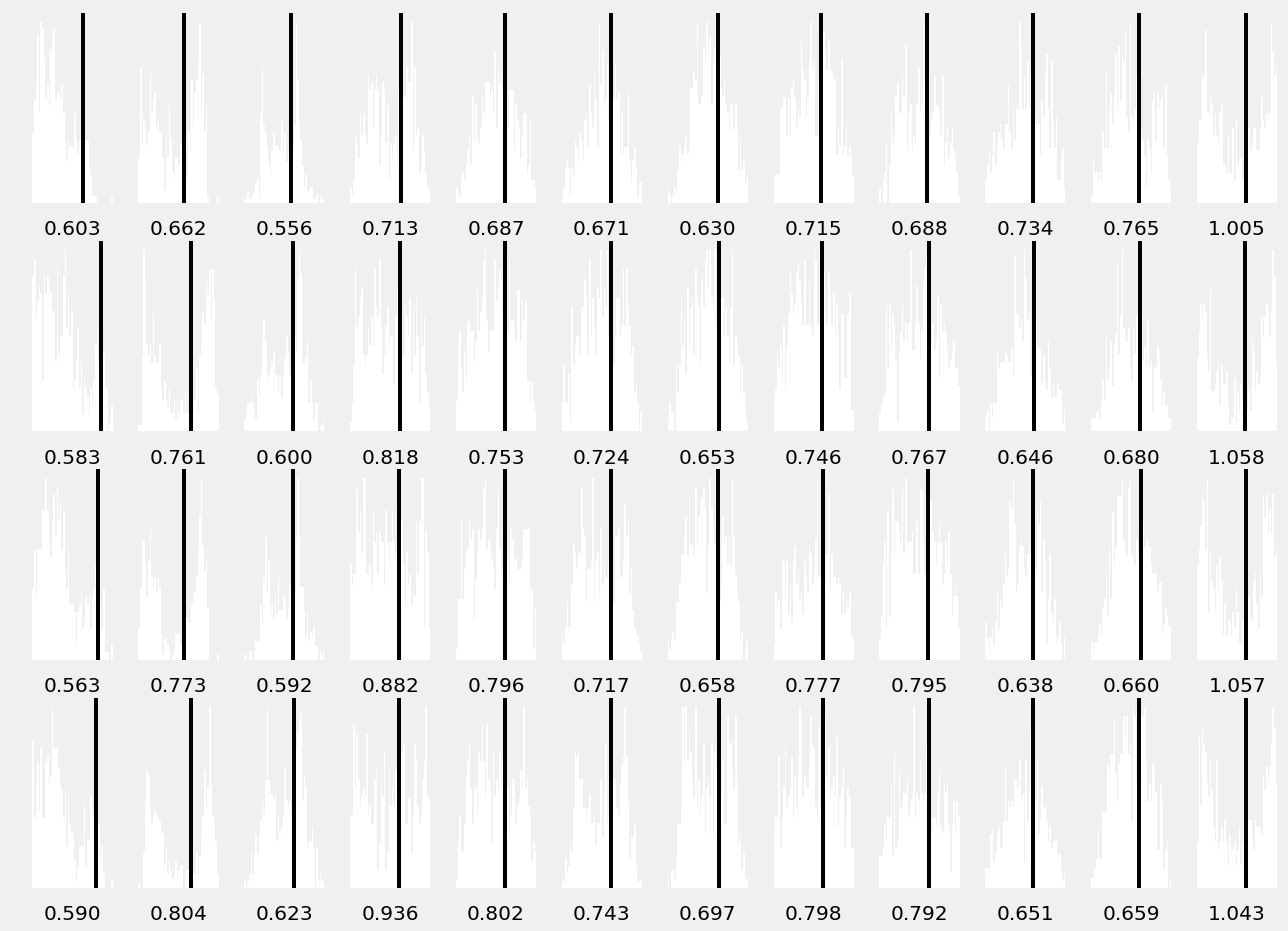

In [83]:
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm
fig, axes = plt.subplots(4, 12, figsize=(20,15))
angle_idxs = tf.constant(
    [[2, 0, 3],
    [2, 0, 4],
    [3, 0, 4],
    [2, 0, 1],
    [3, 0, 1],
    [4, 0, 1],
    [0, 1, 5],
    [0, 1, 6],
    [0, 1, 7],
    [5, 1, 6],
    [5, 1, 7],
    [6, 1, 7]], dtype=tf.int64)
_angle = [1.891, 1.891, 1.891, 1.921, 1.921, 1.921, 1.921, 1.921, 1.921, 1.891, 1.891, 1.891]

for idx0 in range(4):

    z = tf.random.normal((512, 6, 3), stddev=1.0 * (idx0+1))
    x, _ = graph_flow.f_zx(z, atoms, adjacency_map, tf.tile(walk, [512, 1]))
    angles = gin.deterministic.mm.geometry.get_angles(angle_idxs, x)
    
    for idx1 in range(12):
        axes[idx0][idx1].hist(angles[:, idx1], bins=50, color=cm.hot(5 * np.std(angles[:, idx1])))
        axes[idx0][idx1].axis('off')
        axes[idx0][idx1].set_title('%.3f' % np.std(angles[:, idx1]), y=-0.2)
        axes[idx0][idx1].axvline(_angle[idx1], c='k')

plt.axis('off')
plt.savefig('angles.png', dpi=500)


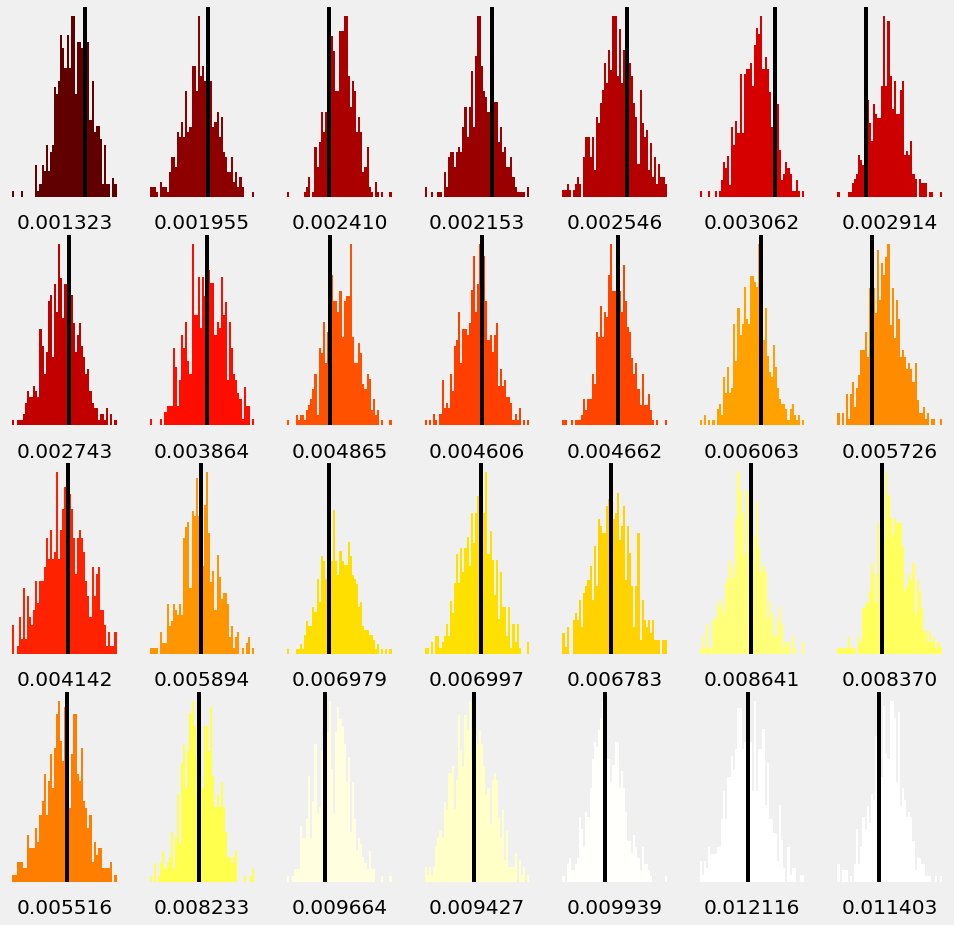

In [36]:
plt.style.use('fivethirtyeight')
import matplotlib.cm as cm
fig, axes = plt.subplots(4, 7, figsize=(15,15))
bond_idxs = tf.constant(
    [
        [0, 2],
        [0, 3],
        [0, 4],
        [0, 1],
        [1, 5],
        [1, 6],
        [1, 7]
    ])
bond_length_ = [0.1092, 0.1092, 0.1092, 0.1535, 0.1092, 0.1092, 0.1092]

for idx0 in range(4):

    z = tf.random.normal((512, 6, 3), stddev=1.0 * (idx0+1))
    x, _ = graph_flow.f_zx(z, atoms, adjacency_map, tf.tile(walk, [512, 1]))

    bond_xyz = tf.gather(
        x,
        bond_idxs,
        axis=1)

    bond_length = tf.norm(
        bond_xyz[:, :, 0, :] - bond_xyz[:, :, 1, :],
        axis=-1)

    for idx1 in range(7):
        axes[idx0][idx1].hist(bond_length[:, idx1], bins=50, color=cm.hot(100 * np.std(bond_length[:, idx1])))
        axes[idx0][idx1].axis('off')
        axes[idx0][idx1].set_title('%1f' % np.std(bond_length[:, idx1]), y=-0.2)
        axes[idx0][idx1].axvline(bond_length_[idx1], c='k')
        
        
plt.axis('off')
plt.savefig('bonds.png', dpi=500)




In [38]:
bond_length = np.array(bond_length)

(array([2., 1., 1., 0., 1., 1., 2., 0., 1., 1.]),
 array([0.14796688, 0.14857432, 0.14918175, 0.1497892 , 0.15039663,
        0.15100408, 0.15161152, 0.15221895, 0.1528264 , 0.15343383,
        0.15404128], dtype=float32),
 <a list of 10 Patch objects>)

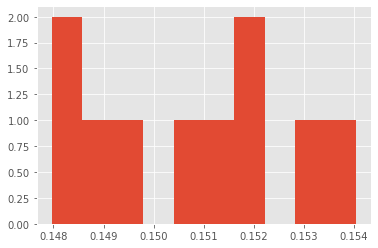

In [40]:
plt.hist(bond_length[:, 0])

In [102]:
bond_idxs, angle_idxs, torsion_idxs, one_four_idxs, nonbonded_idxs = gin.deterministic.mm.indices.get_idxs(
    mol[1])

In [10]:
gin.deterministic.mm.geometry.get_angles(angle_idxs, x)

<tf.Tensor: id=1884, shape=(64, 12), dtype=float32, numpy=
array([[0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.712138